**Lecturer**

Set up MATLAB

In [1]:
cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/01/matlab'



# System Modelling and Simulation

## Contents

* Ordinary differential equations
* Transfer functions
* Integral models
* Using Simulink
* State-space models

## Ordinary Differential Equations

* Used to model a wide variety of so-called “lumped parameter” problems in engineering and technology.
* Based on the fundamental laws of nature such as Ohm’s law, Newton’s laws of motion, thermodynamics, chemistry etc.
* We will assume that you have or can derive such a model in your domain of interest.

### An Example

Spring Mass Damper System

![Spring Mass Damper System (SMD)](images/smd.png)

### Free body diagram

![Freebody diagram](images/freeb.png)

### Differential equation

$$\begin{eqnarray*}
m\ddot x &=& \sum \mathrm{forces} \;\mathrm{in}\;\mathrm{the}\;x\;\mathrm{direction}\\
 &=& F - kx - b\dot x\\
F &=& m\ddot x + kx + b\dot x
\end{eqnarray*}$$

### Challenge for Electrical Engineers

Can you think of a simple electrical circuit that has a similar differential equation?

*Clue*: it would have 1 resistor 1 capacitor and 1 inductor.

## Transfer functions

### Laplace transform

* Allows us to represent a the differential equation representing a linear-time invariant (LTI) system as a rational polynomial in $s$.
* This can be solved for $t$ using the inverse-Laplace transform (time domain).
* Can substitute $s=j\omega$ to determine the response to sinusoidal inputs (frequency domain).

### Transform version of the SMD

Let:

$$\begin{eqnarray*}
X(s) &=& \mathcal{L}x(t)\\
F(s) &=& \mathcal{L}F(t)
\end{eqnarray*}$$

then

$$F(s) = ms^2X(s) + bsX(s) + bX(s)$$

### Transfer function

$$X(s) = \frac{1}{ms^2 + bs + k}F(s)$$

### Block diagram

![Block diagram](images/bd.png)

### MATLAB LTI Object

In [2]:
%%file matlab/smd_params.m
%% SMD_PARAMS - define parameters for Spring Mass Damper (SMD) model
m = 1; % kg
b = 0.6; % Ns/m
k = 5; % N/m

In [3]:
smd_params

In [4]:
smd_tf = tf([1], [m b k])


smd_tf =
 
         1
  ---------------
  s^2 + 0.6 s + 5
 
Continuous-time transfer function.



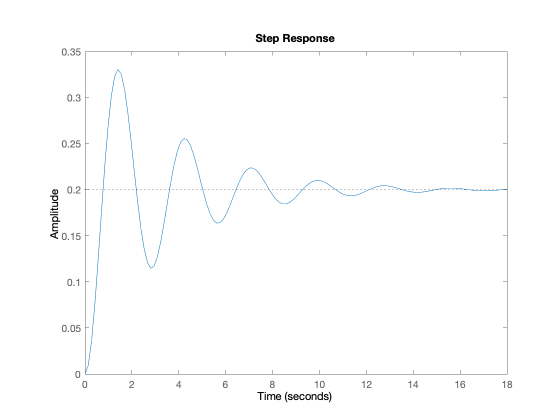

In [5]:
step(smd_tf)

## Integral Models

* If system is non-linear, time-varying or very high order, we may not be able to solve the differential system directly.
* We typically resort to simulation
* MATLAB has a system simulation tool called *Simulink*.
* We first need to convert the differential equation to integral form.

### Integral form

* Makes use of the fact that for any differential term:

$$x(t)=\int_{0}^{t}\,\dot{x}(t)\,dt$$

* We can use this fact to rearrange any *n*<sup>th</sup>-order differential equation into n first-order integral equations.
* Using a numerical integration algorithm, we can solve such equations.



### Integral form of SMD equations

$$\begin{eqnarray*}
\ddot{x}&=&\frac{1}{m}\left(F-b\dot{x}-kx\right)\\
\dot{x}&=&\int\ddot{x}\,dt\\
x&=&\int\dot{x}\,dt
\end{eqnarray*}$$

### Block diagram

![Integral model of SMD](images/intgm.png)

**Note** 

$$\mathcal{L}\left(\int x(t)\,dt\right) = \frac{1}{s}$$


### Simulink model

![Simulink model of SMD system](images/simulink.png)

In [6]:
smd

### Results of simulation

![Results of simulation](images/result.png)

## State-space models

Let $x_1 = x$ and $x_2 = \dot{x}$ then

$$\begin{eqnarray*}
\dot{x}_1&=&x_2\\
\dot{x}_2&=&-\frac{k}{m}x_2-\frac{b}{m}x_1+\frac{F}{m}
\end{eqnarray*}$$

In matrix form

$$\left[ {\begin{array}{*{20}{c}}
  {\dot {x}_1} \\ 
  {\dot {x}_2} 
\end{array}} \right] = \left[ {\begin{array}{*{20}{c}}
  0&1 \\ 
  { - \frac{b}{m}}&{ - \frac{k}{m}} 
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
  {{x_1}} \\ 
  {{x_2}} 
\end{array}} \right] + \left[ {\begin{array}{*{20}{c}}
  0 \\ 
  {\frac{1}{m}} 
\end{array}} \right]F$$

### General state-space model

$$\begin{eqnarray*}
\mathbf{\dot x} &=& {\mathbf{Ax}} + {\mathbf{B}}u\\
y &=& {\mathbf{Cx}} + {\mathbf{D}}u
\end{eqnarray*}$$

### MATLAB LTI Model

In [7]:
A = [0 1; -k/m -b/m]; % state matrix
B = [0; 1/m]; % input matrix
C = [1 0]; % Output matrix - output y = x1
D = [0]; 

In [8]:
smd_ss = ss(A, B, C, D)


smd_ss =
 
  A = 
         x1    x2
   x1     0     1
   x2    -5  -0.6
 
  B = 
       u1
   x1   0
   x2   1
 
  C = 
       x1  x2
   y1   1   0
 
  D = 
       u1
   y1   0
 
Continuous-time state-space model.



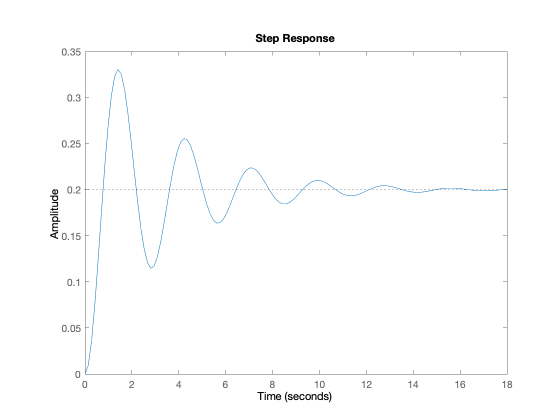

In [9]:
step(smd_ss)

## Comparison

![Comparing models in Simulink](images/smdcompare.png)

In [10]:
smdcompare

### Results

![SMD Comparison](images/smdresults.png)

## Models and their uses

* Integral models for general solution of high-order, linear and non-linear differential equations.
* State-space models for *linear* time-invariant, time-varying and multi-input multi-output (**MIMO**) systems.
* Transfer function for linear time-invariant (**LTI**), single-input single output (**SISO**) systems

## Feedback and suggestions

"**Which bit of this session did you find the most difficult to understand**”

Use the Teams [week 1 discussion](https://teams.microsoft.com/l/channel/19%3aa25f34ac58624f56b6a73358b97d2b42%40thread.skype/Week%25201?groupId=8831ec02-d0cc-4627-b070-40b1bff6a4e4&tenantId=bbcab52e-9fbe-43d6-a2f3-9f66c43df268) to post feedback.

Or tweet @[eglm03](https://twitter.com/eglm03) hashtag #[eglm03](https://twitter.com/hashtag/eglm03)


## Additional Background Material

Background is extra topics, usually references to the recommended text or links to web resources, that are provided to amplify topics that are introduced in the other activities. You are expected to access these materials in your own time. For this chapter, the background reading is all from the [Control Systems Wikibook](https://en.wikibooks.org/wiki/Control_Systems).

* [Systems modeling](https://en.wikibooks.org/wiki/Control_Systems/System_Modeling)
* [Transfer functions](https://en.wikibooks.org/wiki/Control_Systems/Transfer_Functions)
* [State-space equations](http://en.wikibooks.org/wiki/Control_Systems/State-Space_Equations) 